# Model Interventions Notebook

This notebook covers:
- An example of how to run a simulation with interventions, summarise the results, and plot them
- Example results demonstrating the different simulations with multiple interventions that can be run and some simple comparisons.

We begin by importing the necessary modules.

In [1]:
import pandas as pd
import os

import pyEpiabm as pe
from toy_plotter import Plotter

## Single intervention, different parameter values

For this example, we show how to run a simulation with the Case Isolation intervention and how parameters influence the infections curve. We run five repeat simulations for the 4x4 model population, saving the output of each for subseqent processing. All simulations begin with 10 infected individuals and are run for 120 days.

In [3]:
# This simulation will take approx 30 min

number_repetitions = 5
grid_size = 4
input_population_folder = 'uniform_inputs'
output_folder = 'simulation_outputs'
parameter_file_name = "IntCI_params.json"

# Set intervention parameters for simulations
sim_parameters = [{'case_isolation': {'start_time': 360}},
                  {'case_isolation': {'start_time': 0, 'isolation_probability': 0.5}},
                  {'case_isolation': {'start_time': 0, 'isolation_probability': 1.0}}]
sim_parameters_labels = ['No intervention', '50% CI', '100% CI']

# Set config file for Parameters
pe.Parameters.set_file(os.path.join(os.path.abspath(''), parameter_file_name))

# Set the infection radius to capture all cells 
pe.Parameters.instance().infection_radius = (int(grid_size)**2+int(grid_size)**2)**0.5 +0.01

# load in the population configuration file
file_loc = f"input_{grid_size}x{grid_size}_av5_places.csv"

# we run the simulation for 5 repetitions by changing the seed 
for i in range(number_repetitions):
    print("Set seed to:", i)
    set_seed = i
    for j in range(len(sim_parameters)):
        # Set the output file name
        output_file = f"output_{grid_size}x{grid_size}_{sim_parameters_labels[j]}_rep{i}_.csv"

        # Set parameters
        for key_int in sim_parameters[j].keys():
            for key_param in sim_parameters[j][key_int].keys():
                pe.Parameters.instance().intervention_params[
                    key_int][key_param] = sim_parameters[j][
                        key_int][key_param]
                print('set {} {} parameter to {}'.format(
                    key_int, key_param,
                    pe.Parameters.instance().intervention_params[
                        key_int][key_param]))
        
        population = pe.routine.FilePopulationFactory.make_pop(
            os.path.join(os.path.abspath(''), input_population_folder, file_loc),
            random_seed=i)
        
        # Assign places
        pe.routine.ToyPopulationFactory.add_places(population, 1)
        
        # sim_ and file_params give details for the running of the simulations
        # and where output should be written to.
        sim_params = {"simulation_start_time": 0,
                      "simulation_end_time": 120,
                      "initial_infected_number": 10,
                      "initial_infect_cell": True,
                      "simulation_seed": i}
        
        file_params = {"output_file": output_file,
                       "output_dir": os.path.join(os.path.abspath(''),
                                              output_folder),
                       "spatial_output": True,
                       "age_stratified": True}
        
        # Create a simulation object, configure it with the parameters given,
        # then run the simulation including the InterventionSweep.
        sim = pe.routine.Simulation()
        sim.configure(
            population,
            [pe.sweep.InitialHouseholdSweep(),
                pe.sweep.InitialInfectedSweep(),
                pe.sweep.InitialisePlaceSweep()],
            [
                pe.sweep.InterventionSweep(),
                pe.sweep.UpdatePlaceSweep(),
                pe.sweep.HouseholdSweep(),
                pe.sweep.PlaceSweep(),
                pe.sweep.SpatialSweep(),
                pe.sweep.QueueSweep(),
                pe.sweep.HostProgressionSweep(),
            ],
            sim_params,
            file_params,
        )
        sim.run_sweeps()

        # Need to close the writer object at the end of each simulation.
        del (sim.writer)
        del (sim)


Set seed to: 0
set case_isolation start_time parameter to 360


100%|██████████| 120/120 [02:01<00:00,  1.01s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 0.5


100%|██████████| 120/120 [02:09<00:00,  1.08s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 1.0


100%|██████████| 120/120 [02:03<00:00,  1.03s/it]


Set seed to: 1
set case_isolation start_time parameter to 360


100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 0.5


100%|██████████| 120/120 [02:00<00:00,  1.00s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 1.0


100%|██████████| 120/120 [01:55<00:00,  1.04it/s]


Set seed to: 2
set case_isolation start_time parameter to 360


100%|██████████| 120/120 [02:11<00:00,  1.10s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 0.5


100%|██████████| 120/120 [02:11<00:00,  1.10s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 1.0


100%|██████████| 120/120 [02:21<00:00,  1.18s/it]


Set seed to: 3
set case_isolation start_time parameter to 360


100%|██████████| 120/120 [02:08<00:00,  1.07s/it]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 0.5


100%|██████████| 120/120 [01:55<00:00,  1.04it/s]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 1.0


100%|██████████| 120/120 [01:59<00:00,  1.01it/s]


Set seed to: 4
set case_isolation start_time parameter to 360


100%|██████████| 120/120 [01:49<00:00,  1.10it/s]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 0.5


100%|██████████| 120/120 [01:49<00:00,  1.09it/s]


set case_isolation start_time parameter to 0
set case_isolation isolation_probability parameter to 1.0


100%|██████████| 120/120 [01:49<00:00,  1.09it/s]


We then calculate the mean and standard deviation across the repetitions and plot the results.

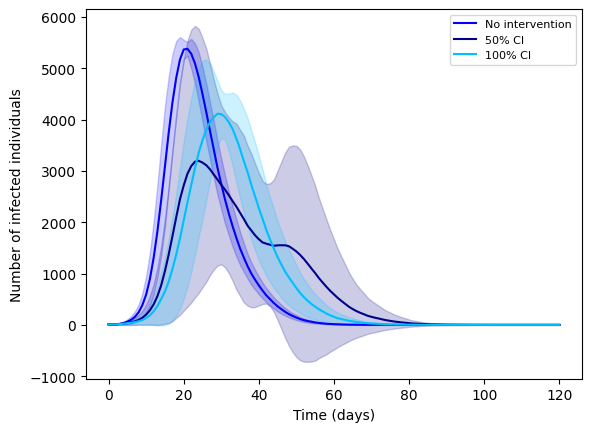

In [4]:
p = Plotter(output_folder, grid_size, number_repetitions, sim_parameters, sim_parameters_labels)
dict_CI_summary = p._summarise_outputs()
p._multiple_curve_plotter(dict_CI_summary)

This figure shows the number of infected individuals per day. Case Isolation delays the peak of infections with a reduced number of the maximum infected individuals. Higher compliance to the intervention has a stronger effect.

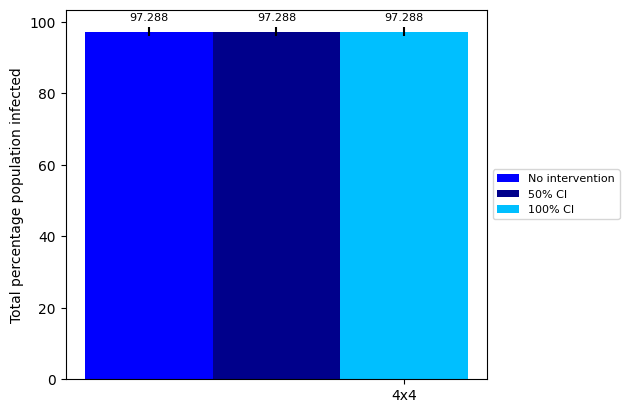

In [5]:
p._total_recovered_bars(dict_CI_summary)

This figure shows the total number of infections over the total simulations. Results show that 

In [6]:
p._summary_table(dict_CI_summary)

,simulation,percentage_mean_infections,percentage_sd_infections,height_peak,time_peak
0,No intervention,98.482,0.204255,5381.4,21.0
1,50% CI,97.796,0.816045,3198.4,24.0
2,100% CI,97.288,1.235625,4117.6,29.0


This tabel summarises the mean and standard deviation of the total number of infections (in percentages), the maximum height of the peak observed and the day on which this peak is observed for a simulation without interventions, the Case Isolation intervention with a 50% compliance, and the Case Isolation intervention with a 100% compliance.

## Multiple interventions

We can then compare the infection curves for simulations in which multiple interventions are active. Here we compare a simulation without interventions, a simulation with only the Case Isolation intervention, a simulation in which Household Quarantine is an additional intervention on top of Case Isolation, and a simulation with Case Isolation, Household Quarantine, and the Place Closure intervention.

The summary file of this simulation is generated with the above code using the folowing parameters:

In [7]:
number_repetitions = 10
grid_size = 4
input_population_folder = 'uniform_inputs'
output_folder = 'simulation_outputs'
parameter_file_name = "IntMult_params.json"

sim_parameters = [{'case_isolation': {'start_time': 360}, 'place_closure': {'start_time': 360}, 'household_quarantine': {'start_time': 360}},
                  {'case_isolation': {'start_time': 0}, 'place_closure': {'start_time': 360}, 'household_quarantine': {'start_time': 360}},
                  {'case_isolation': {'start_time': 0}, 'place_closure': {'start_time': 360}, 'household_quarantine': {'start_time': 0}},
                  {'case_isolation': {'start_time': 0}, 'place_closure': {'start_time': 0}, 'household_quarantine': {'start_time': 0}}]
sim_parameters_labels = ['No intervention', 'CI', 'CI+HQ', 'CI+HQ+PC']

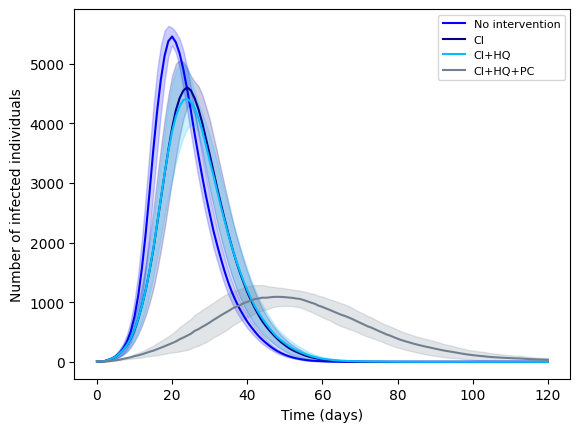

,simulation,percentage_mean_infections,percentage_sd_infections,height_peak,time_peak
0,No intervention,97.850,0.161314,5452.6,20.0
1,CI,96.685,0.658690,4600.3,24.0
2,CI+HQ,95.667,1.229065,4407.5,24.0
3,CI+HQ+PC,56.942,3.368524,1089.3,48.0


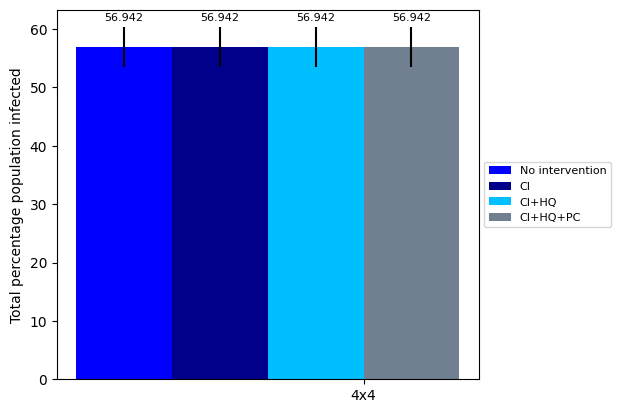

In [9]:
dict_multi_summary = {}
for sim_label in sim_parameters_labels:
    df = pd.read_csv(f"simulation_outputs/multi_interventions/summary_4x4_av5_{sim_label}.csv")
    dict_multi_summary[sim_label] = df

# Show results
p = Plotter(output_folder, grid_size, number_repetitions, sim_parameters, sim_parameters_labels)
p._multiple_curve_plotter(dict_multi_summary)
p._total_recovered_bars(dict_multi_summary)
p._summary_table(dict_multi_summary)